In [48]:
import pandas as pd 
import numpy as np 
import sqlalchemy
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
import datetime as dt
from dateutil.relativedelta import *
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import getpass
from sklearn.decomposition import PCA
import quandl
import prophet as ph

%matplotlib inline

In [2]:
quandl.ApiConfig.api_key = "vyVGYrkwX2gNfZZyBG-N"

In [3]:
def NS(m, b0, b1, b2, t):
    #t = 1
    return b0 + b1 * (1-np.exp(-m/t))/(m/t) + b2 * ((1-np.exp(-m/t)) / (m/t) - np.exp(-m/t))


In [4]:
yieldsquandl = quandl.get("USTREASURY/YIELD")


In [34]:
yields = yieldsquandl.asfreq('D')

In [35]:
maturities = [ 3/12, 0.5, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0, 20.0, 30.0]
selected_cols = [2,3,4,5,6,7,8,9, 10, 11]
yields = yields.loc[:,yields.columns[selected_cols]]

In [36]:
yields = yields.fillna(method = 'ffill')

In [37]:
dates = yields.index

In [38]:
yields.loc[dates[0]].values

array([7.83, 7.89, 7.81, 7.87, 7.9 , 7.87, 7.98, 7.94,  nan, 8.  ])

In [39]:
yields = yields['2009-12-31':]
dates = yields.index

In [40]:
ns = pd.DataFrame(columns = ['dataref', 'b0','b1','b2','t'])
for d in dates:
    # df0 = df_govt.set_index('dataref').loc[d]
    popt, pcov = curve_fit(NS, maturities, yields.loc[d].values, np.array([0.02, 0.02, 0.02, 0.02]))
    ns = ns.append([{ 'dataref':d, 'b0':popt[0], 'b1':popt[1], 'b2':popt[2], 't':popt[3]}])

ns = ns.set_index(['dataref'])

In [44]:
ns = ns[ns.b0>0]

<AxesSubplot:xlabel='dataref'>

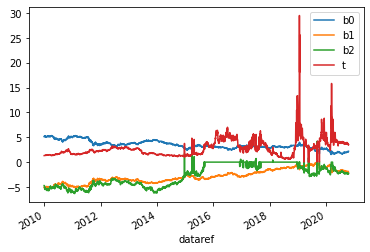

In [53]:
import os
print (os.getcwd())
yc = pd.read_excel('YieldCurveDownload.xlsx')

/Users/giovanni/OneDrive/Projects/AGI/YieldCurves


FileNotFoundError: [Errno 2] No such file or directory: 'YieldCurveDownload.xlsx'